# Perform EVAT GenerativeAI multi-table generation comparison

Load the Original Data Model tables

Define the original data model entity relationships

Train the AI Model on the above data.

Generate a new Dataset using AI synthesis.

Compare the original data Model Versus the synthesized dataset/


## Data preparation

Fetch & Review original Data Model Files

In [1]:
# prompt: load  ChargingSession.csv into a dataframe ChargingSession, load OrderScheduling.csv into a dataframe OrderScheduling, load PurchaseWholesaleElec.csv into a dataframe PurchaseWholesaleElec, load Stations.csv into a dataframe Stations, load UserPayment.csv into a dataframe UserPayment, load Users.csv into a dataframe Users, load ev.csv into a dataframe ev

import pandas as pd

# Load the datasets into pandas DataFrames
ChargingSession = pd.read_csv('ChargingSession.csv')
OrderScheduling = pd.read_csv('OrderScheduling.csv')
PurchaseWholesaleElec = pd.read_csv('PurchaseWholesaleElec.csv')
Stations = pd.read_csv('Stations.csv')
UserPayment = pd.read_csv('UserPayment.csv')
Users = pd.read_csv('Users.csv')
ev = pd.read_csv('ev.csv')

In [2]:
ChargingSession.head(2)

,Id,SlotID,UserId,StationId,LocationId,ChargeStartTime,ChargeEndTime,ChargeTimeHrs,KwhTotal,CustPricePerKW,CustPayAmount,BookingDate,ConnectorType,OrderId,PurchaseId
0,4926737,841344,78908148,730023,878393,7/10/2023 7:18,7/10/2023 8:44,0 days 01:26:00,82.049511,0.570110,46.777252,7/10/2023,CCS,4926737,4926737
1,3738844,252642,78908148,730023,878393,5/08/2023 5:29,5/08/2023 7:01,0 days 01:32:00,88.246562,0.532488,46.990274,5/08/2023,CCS,3738844,3738844


In [ ]:
OrderScheduling.head(2)

,Id,UserId,StationId,SlotId,ConnectorType,BookingDate,SlotStartTime,SlotLength,EstCost50KWCharger,BookingTimeSlots,BookingDeposit
0,4926737,78908148,730023,841344,CCS,7/10/2023,7,2,55.0,"[7, 8, 9]",1
1,3738844,78908148,730023,252642,CCS,5/08/2023,5,3,82.5,"[5, 6, 7, 8]",1


In [ ]:
PurchaseWholesaleElec.head(2)

,Id,StationId,SupplyId,ExpenditureCode,RRPperKW,RRPperKW24hrs,BasePrice,PeakPriceAdjustment,CustPricePerKW,PurchaseDate
0,4926737,730023,VIC,Wholesale_cost,0.01156,0.020110,0.55,0,0.570110,7/10/2023 7:18
1,3738844,730023,VIC,Wholesale_cost,0.00895,-0.017512,0.55,0,0.532488,5/08/2023 5:29


In [ ]:
Stations.head(2)

,Id,ChargingPoints,Latitude,Longitude,OperatorID,Address,Amenities,BasePrice,PeakPriceAdjustment,EstCost50KWChargerHr,SlotIDs,ConnectionTypes,PaymentTypes,PowerOutput,LocationName,PostalCode,LocationID
0,488364,2,-37.813437,144.955934,TBD,"535 Little Lonsdale St, Melbourne VIC 3004, Au...","Grocery, Valet Parking, Coffee",0.55,0,27.5,"[765259, 394263]",Tesla,"['American Express', 'Visa', 'MasterCard', 'Ca...",NaN,Lonsdale St,3000,648339
1,540225,10,-37.818758,144.958866,TBD,"450 Flinders Ln, Melbourne VIC 3000, Australia","Dining, Grocery, Restrooms, Car Cleaning, Coff...",0.55,0,27.5,"[581698, 746443, 850701, 113295, 293235, 72610...",Type2,"['American Express', 'Visa', 'MasterCard', 'Ca...",NaN,Secure Parking (450 Flinders Lane),3000,648339


In [ ]:
UserPayment.head(2)

,Id,BookingDeposit,PurchaseId,PaymentType,CustPayAmount,TransAmount,UserId,StationId,PaymentDate,ChargingId,OrderId
0,4926737,1,4926737,MasterCard,46.777252,45.777252,78908148,730023,7/10/2023 8:44,4926737,4926737
1,3738844,1,3738844,Visa,46.990274,45.990274,78908148,730023,5/08/2023 7:01,3738844,3738844


In [ ]:
Users.head(2)

,Id,UserFirstName,UserSurname,UserFullName,UserEmailAddress,UserPassword,UserRole,UserHomeAddress,UserMobilePhoneNumber,UserAuthenticated,VehicleID
0,78908148,Leslie,Shelton,Jame Martinez,mileage1881@duck.com,U]s$k]Xr,user,340 Larkstone Bridge,415255335,1,IJWO2541
1,35897499,Bob,Bender,Branda Delacruz,interpreted1898@yandex.com,5WQcKdpb,user,389 Leenagrenagh Creek,415255336,1,JQVH4255


In [ ]:
ev.head(2)

,Id,Manufacturer,Model,VehicleYear,VehicleClass,FuelType,ConnectorType,BatteryCapacityKwh,EstBattChargeTime80perc50KW,EnergyConsumptionWhkm,ElectricRangeKm,UserId
0,IJWO2541,Audi,Audi e-tron,2024,Large SUV,BEV,CCS,106.488,89.44992,23.2,459,78908148
1,JQVH4255,Audi,Audi e-tron GT,2024,Large Car,BEV,CCS,103.680,87.09120,19.2,540,35897499


## Train a multi-table generator

Configuring a mutli-table generator is simply done, by configuring each table, their primary key as well as all their foreign key relations.



In [3]:
!pip install -U mostlyai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [4]:
from mostlyai import MostlyAI

# initialize client
mostly = MostlyAI(api_key='mostly-a85530a98a3abb708825e71e667bb3df2350fbaa90eb7ba4fccbb84e0a07cf53')

Connected to https://app.mostly.ai (v321) as john.collins@sensation360.com

In [5]:


# Define the configuration for the generator
config = {
    "name": "Multi-table - EVAT2",
    "tables": [
        {
            "name": "ev",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "Manufacturer", "type": "string"},
                {"name": "Model", "type": "string"},
                {"name": "VehicleYear", "type": "integer"},
                {"name": "VehicleClass", "type": "string"},
                {"name": "FuelType", "type": "string"},
                {"name": "ConnectorType", "type": "string"},
                {"name": "BatteryCapacityKwh", "type": "float"},
                {"name": "EstBattChargeTime80perc50KW", "type": "float"},
                {"name": "EnergyConsumptionWhkm", "type": "float"},
                {"name": "ElectricRangeKm", "type": "float"},
                {"name": "UserId", "type": "integer"}
            ],
            "data": ev,
        },
        {
            "name": "Users",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "UserFirstName", "type": "string"},
                {"name": "UserSurname", "type": "string"},
                {"name": "UserFullName", "type": "string"},
                {"name": "UserEmailAddress", "type": "string"},
                {"name": "UserPassword", "type": "string"},
                {"name": "UserRole", "type": "string"},
                {"name": "UserHomeAddress", "type": "string"},
                {"name": "UserMobilePhoneNumber", "type": "integer"},
                {"name": "UserAuthenticated", "type": "integer"},
                {"name": "VehicleID", "type": "integer"}
            ],
            "foreign_keys": [
                {"column": "VehicleID", "references": "ev.Id", "referencedTable": "ev", "is_context": True} # Added referencedTable
            ],
            "data": Users,
        },
        {
            "name": "Stations",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "ChargingPoints", "type": "integer"},
                {"name": "Latitude", "type": "float"},
                {"name": "Longitude", "type": "float"},
                {"name": "OperatorID", "type": "string"},
                {"name": "Address", "type": "string"},
                {"name": "Amenities", "type": "string"},
                {"name": "BasePrice", "type": "float"},
                {"name": "PeakPriceAdjustment", "type": "float"},
                {"name": "EstCost50KWChargerHr", "type": "float"},
                {"name": "SlotIDs", "type": "string"},
                {"name": "ConnectionTypes", "type": "string"},
                {"name": "PaymentTypes", "type": "string"},
                {"name": "PowerOutput", "type": "float"},
                {"name": "LocationName", "type": "string"},
                {"name": "PostalCode", "type": "integer"},
                {"name": "LocationID", "type": "integer"}
            ],
            "data": Stations,
        },
        {
            "name": "OrderScheduling",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "UserId", "type": "integer"},
                {"name": "StationId", "type": "integer"},
                {"name": "SlotId", "type": "integer"},
                {"name": "ConnectorType", "type": "string"},
                {"name": "BookingDate", "type": "datetime"},
                {"name": "SlotStartTime", "type": "integer"},
                {"name": "SlotLength", "type": "integer"},
                {"name": "EstCost50KWCharger", "type": "float"},
                {"name": "BookingTimeSlots", "type": "string"},
                {"name": "BookingDeposit", "type": "float"}
            ],
            "foreign_keys": [
                {"column": "UserId", "references": "Users.Id", "referencedTable": "Users", "is_context": False}, # Added referencedTable
                {"column": "StationId", "references": "Stations.Id", "referencedTable": "Stations", "is_context": True} # Added referencedTable
            ],
            "data": OrderScheduling
        },
                {
            "name": "UserPayment",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "BookingDeposit", "type": "float"},
                {"name": "PurchaseId", "type": "integer"},
                {"name": "PaymentType", "type": "string"},
                {"name": "CustPayAmount", "type": "float"},
                {"name": "TransAmount", "type": "float"},
                {"name": "UserId", "type": "integer"},
                {"name": "StationId", "type": "integer"},
                {"name": "PaymentDate", "type": "datetime"},
                {"name": "ChargingId", "type": "integer"},
                {"name": "OrderId", "type": "integer"}
            ],
            "foreign_keys": [
                {"column": "PurchaseId", "references": "PurchaseWholesaleElec.Id", "referencedTable": "PurchaseWholesaleElec", "is_context": False}, # Added referencedTable
                {"column": "StationId", "references": "Stations.Id", "referencedTable": "Stations", "is_context": False}, # Added referencedTable
                {"column": "UserId", "references": "Users.Id", "referencedTable": "Users", "is_context": False}, # Added referencedTable
                {"column": "OrderId", "references": "OrderScheduling.Id", "referencedTable": "OrderScheduling", "is_context": False}, # Added referencedTable
                {"column": "ChargingId", "references": "ChargingSession.Id", "referencedTable": "ChargingSession", "is_context": True} # Added referencedTable
            ],
            "data": UserPayment, # Use the UserPayment DataFrame directly
        },
        {
            "name": "PurchaseWholesaleElec",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "StationId", "type": "integer"},
                {"name": "SupplyId", "type": "string"},
                {"name": "ExpenditureCode", "type": "string"},
                {"name": "RRPperKW", "type": "float"},
                {"name": "RRPperKW24hrs", "type": "float"},
                {"name": "BasePrice", "type": "float"},
                {"name": "PeakPriceAdjustment", "type": "float"},
                {"name": "CustPricePerKW", "type": "float"},
                {"name": "PurchaseDate", "type": "datetime"}
            ],
            "foreign_keys": [
                {"column": "StationId", "references": "Stations.Id", "referencedTable": "Stations", "is_context": True} # Added referencedTable
            ],
            "data": PurchaseWholesaleElec,
        },
        {
            "name": "ChargingSession",
            "primary_key": "Id",
            "columns": [
                {"name": "Id", "type": "integer"},
                {"name": "SlotID", "type": "integer"},
                {"name": "UserId", "type": "integer"},
                {"name": "StationId", "type": "integer"},
                {"name": "LocationId", "type": "integer"},
                {"name": "ChargeStartTime", "type": "datetime"},
                {"name": "ChargeEndTime", "type": "datetime"},
                {"name": "ChargeTimeHrs", "type": "string"},
                {"name": "KwhTotal", "type": "float"},
                {"name": "CustPricePerKW", "type": "float"},
                {"name": "CustPayAmount", "type": "float"},
                {"name": "BookingDate", "type": "datetime"},
                {"name": "ConnectorType", "type": "string"},
                {"name": "OrderId", "type": "integer"},
                {"name": "PurchaseId", "type": "integer"}
            ],
            "foreign_keys": [
                {"column": "OrderId", "references": "OrderScheduling.Id", "referencedTable": "OrderScheduling", "is_context": True}, # Added referencedTable
                {"column": "UserId", "references": "Users.Id", "referencedTable": "Users", "is_context": False}, # Added referencedTable
                {"column": "StationId", "references": "Stations.Id", "referencedTable": "Stations", "is_context": False}, # Added referencedTable
                {"column": "PurchaseId", "references": "PurchaseWholesaleElec.Id", "referencedTable": "PurchaseWholesaleElec", "is_context": False} # Added referencedTable
            ],
            "data": ChargingSession
        }
    ]
}

# Display the generator configuration
#config


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# configure a generator, but don't yet start the training thereof
g = mostly.train(config=config, start=False)

# open generator in a new browser tab
g.open()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Created generator ]8;id=809282;https://app.mostly.ai/d/generators/917375b2-3456-4feb-bd10-31af72ea82bf\917375b2-3456-4feb-bd10-31af72ea82bf]8;;\

'https://app.mostly.ai/d/generators/917375b2-3456-4feb-bd10-31af72ea82bf'

You can now also inspect the configuration on the Web UI. It will look like this:

<img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/dev/multi-table/berka-ui-1.png' width="300px"/>
<img src='https://raw.githubusercontent.com/mostly-ai/mostly-tutorials/dev/multi-table/berka-ui-2.png' width="300px"/>

Now, launch the training, and wait for it to be finished. This shouldn't take longer than 10 minutes.

In [ ]:
g.training.start()
g = g.training.wait(progress_bar=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Output()

## Generate a multi-table dataset

Once, the training has completed, you can generate a multi-table dataset with. If you do not specify the sample size, then the platform will generate as many subject records, as there were in the original subject tables. Otherwise, you will need to specify for each subject table, the number of records, as these are independently sampled.

In [ ]:
# use generator to create a synthetic dataset
sd = mostly.generate('917375b2-3456-4feb-bd10-31af72ea82bf', start=False)
sd.open()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Created synthetic dataset ]8;id=956800;https://app.mostly.ai/d/synthetic-datasets/66523b04-edb4-4c86-a504-483bbf548c4a\66523b04-edb4-4c86-a504-483bbf548c4a]8;;\ with generator ]8;id=354152;https://app.mostly.ai/d/generators/92b02a05-3696-4667-b0aa-1ec3f575d61c\92b02a05-3696-4667-b0aa-1ec3f575d61c]8;;\

'https://app.mostly.ai/d/synthetic-datasets/66523b04-edb4-4c86-a504-483bbf548c4a'

In [ ]:
sd.generation.start()
sd = sd.generation.wait(progress_bar=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Output()

Step  FINALIZE_GENERATION failed

## Fetch the Generated Data

In [6]:
# fetch configuration via API
sd = mostly.synthetic_datasets.get('54b2599b-fbc2-44f6-ba0f-d6707fa74ee3')
config = sd.config()
config

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{
    'generator_id': '5553e76e-da5d-476c-8275-58da2d52307d',
    'name': 'EVAT_DB',
    'description': 'EVAT Charging Session Data',
    'tables': [
        {
            'name': 'ev',
            'configuration': {
                'sample_size': 85,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': None
            }
        },
        {
            'name': 'Users',
            'configuration': {
                'sample_size': None,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': None
            }
        },
        {
            'name': 'Stations',
            'configuration': {
                'sample_size': 105,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': 'd2dc8ce3-2861-4bea-95c2-99c01a2ed084'
            }
        },
        {
            'name': 'OrderScheduling',
            'configuration': {
                'sample_size': None,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': None
            }
        },
        {
            'name': 'ChargingSession',
            'configuration': {
                'sample_size': None,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': None
            }
        },
        {
            'name': 'UserPayment',
            'configuration': {
                'sample_size': None,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
                'rebalancing': None,
                'imputation': None,
                'fairness': None,
                'tabular_compute': 'c5f0d5da-04d9-4099-8394-e1048a469a5a',
                'language_compute': None
            }
        },
        {
            'name': 'PurchaseWholesaleElec',
            'configuration': {
                'sample_size': None,
                'sample_seed_connector_id': None,
                'sample_seed_dict': None,
                'sample_seed_data': None,
                'sampling_temperature': 1.0,
                'sampling_top_p': 1.0,
              

SyntheticDatasetConfig(generator_id='5553e76e-da5d-476c-8275-58da2d52307d', name='EVAT_DB', description='EVAT Charging Session Data', tables=[SyntheticTableConfig(name='ev', configuration=SyntheticTableConfiguration(sample_size=85, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None)), SyntheticTableConfig(name='Users', configuration=SyntheticTableConfiguration(sample_size=None, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None)), SyntheticTableConfig(name='Stations', configuration=SyntheticTableConfiguration(sample_size=105, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute='d2dc8ce3-2861-4bea-95c2-99c01a2ed084')), SyntheticTableConfig(name='OrderScheduling', configuration=SyntheticTableConfiguration(sample_size=None, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None)), SyntheticTableConfig(name='ChargingSession', configuration=SyntheticTableConfiguration(sample_size=None, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None)), SyntheticTableConfig(name='UserPayment', configuration=SyntheticTableConfiguration(sample_size=None, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None)), SyntheticTableConfig(name='PurchaseWholesaleElec', configuration=SyntheticTableConfiguration(sample_size=None, sample_seed_connector_id=None, sample_seed_dict=None, sample_seed_data=None, sampling_temperature=1.0, sampling_top_p=1.0, rebalancing=None, imputation=None, fairness=None, tabular_compute='c5f0d5da-04d9-4099-8394-e1048a469a5a', language_compute=None))], delivery=None)

In [7]:
# once done, fetch the synthetic data as dictionary of DataFrames
synthetics = sd.data()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Show sample records for each table

In [8]:
for k in synthetics:
    print("===", k, "===")
    display(synthetics[k].sample(n=3))

=== Users ===


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,UserFirstName,UserSurname,UserFullName,UserEmailAddress,UserPassword,UserRole,UserHomeAddress,UserMobilePhoneNumber,UserAuthenticated,VehicleID
31,mostlyff-aa94-406b-862c-17dd5d1332ca,_RARE_,_RARE_,_RARE_,_RARE_,_RARE_,user,_RARE_,415255376,1,mostly12-c7c9-4974-a87d-c708ae6aef43
28,mostly13-a658-4b5a-a0c5-ef6a4bf964be,_RARE_,_RARE_,_RARE_,_RARE_,_RARE_,user,_RARE_,415255406,1,mostlyb0-651a-4f88-a7d2-df94e738d114
54,mostly57-9bc7-4d41-852e-c0c8a82163cb,_RARE_,_RARE_,_RARE_,_RARE_,_RARE_,user,_RARE_,415255409,1,mostly1d-bacf-4f80-8f1a-f84163f45c7b


=== OrderScheduling ===


,Id,UserId,StationId,SlotId,ConnectorType,BookingDate,SlotStartTime,SlotLength,EstCost50KWCharger,BookingTimeSlots,BookingDeposit
3609,mostly68-5cda-4802-ac42-147fd8084d2d,162.0,mostlyaa-93d1-4ed2-b515-864050624e21,214539,CCS,2023-06-01,21,3,55.0,"[15, 16, 17]",1
1902,mostly4f-5877-4179-a9a8-e971da7ed7ff,9.0,mostlya2-db7e-4114-8569-1a85f7b00ac7,567648,CCS,2023-05-01,15,2,55.0,"[12, 13, 14, 15]",1
3066,mostlyd9-f5d0-49ab-a526-fac44398ebfc,2.0,mostly00-2d92-49e6-8d26-c2da4cd41640,234781,CCS,NaT,17,2,55.0,"[17, 18, 19]",1


=== Stations ===


,Id,ChargingPoints,Latitude,Longitude,OperatorID,Address,Amenities,BasePrice,PeakPriceAdjustment,EstCost50KWChargerHr,SlotIDs,ConnectionTypes,PaymentTypes,PowerOutput,LocationName,PostalCode,LocationID
15,mostly20-60a1-4576-a0f0-c0f3915b108b,3,-37.75771,144.955264,TBD,,_INVALID_,0.55,0,27.5,_INVALID_,Type2,"['American Express', 'Visa', 'MasterCard', 'Ca...",<NA>,_INVALID_,3078,456265
83,mostlyd1-a726-4d9c-a3b6-d3b0079c8954,5,-37.802159,144.970827,TBD,144RmeTBDwen77intoobour.Amwerction RdR37catio...,st50uitioceryoChargingPointsG12laiclTyp0000000...,0.55,0,27.5,_INVALID_,_RARE_,"['American Express', 'Visa', 'MasterCard', 'Ca...",23.127,_INVALID_,3076,875297
61,mostly22-17aa-4ea7-8995-26ec87db19bc,2,-37.783702,144.89731,TBD,E39StericUChargerHr66sPrPull Restrooms WJ MelU...,6,0.55,0,27.5,[alet:asetu Park80leOutputAmerican3,Tesla,"['American Express', 'Visa', 'MasterCard', 'Ca...",<NA>,_INVALID_,3033,413802


=== UserPayment ===


,Id,BookingDeposit,PurchaseId,PaymentType,CustPayAmount,TransAmount,UserId,StationId,PaymentDate,ChargingId,OrderId
1178,mostlya0-bd1b-4800-953b-e35fc784ff73,1,7.0,Cash,27.957449,35.685663,7.0,0.0,NaT,mostlyc0-09bb-4684-959b-ee7a0fb0d556,-35.0
1797,mostly28-f1e4-4094-833a-13b71269d386,1,94.0,MasterCard,32.84096,27.127117,6.0,14.0,NaT,mostlyb7-aee5-4dea-87b5-c588e61667cb,19.0
1225,mostlyd4-c6b0-44a1-a5a0-87c5f9937333,1,6.0,Cash,50.028035,30.306651,91.0,9.0,NaT,mostly6a-0c49-4323-8063-b54c5e80439e,-75.0


=== ChargingSession ===


,Id,SlotID,UserId,StationId,LocationId,ChargeStartTime,ChargeEndTime,ChargeTimeHrs,KwhTotal,CustPricePerKW,CustPayAmount,BookingDate,ConnectorType,OrderId,PurchaseId
2651,mostlyfb-ef95-4d26-9343-20d0754ea3ac,480509,-4454.0,1.0,181553,NaT,NaT,0 days 01:00:00,53.039271,0.582842,36.838304,NaT,CCS,mostly4c-6ca1-4435-b94d-4b1567d61794,75.0
1064,mostlyf5-32d6-499b-9eae-0aa2c80c6048,176687,57.0,22.0,698346,2023-05-10 10:12:00,NaT,0 days 01:00:00,76.275731,0.692351,35.628664,2023-06-10,CCS,mostlyc9-5b09-4ce2-a2fc-7da44fe4d3a4,90.0
3250,mostly35-27b1-479f-ae9a-bb9aee69c601,664572,13.0,19.0,492042,NaT,NaT,0 days 01:17:00,55.518466,0.532505,33.708,NaT,CCS,mostly8c-9857-4da5-88fe-ccc0d61d69f4,32.0


=== PurchaseWholesaleElec ===


,Id,StationId,SupplyId,ExpenditureCode,RRPperKW,RRPperKW24hrs,BasePrice,PeakPriceAdjustment,CustPricePerKW,PurchaseDate
822,mostly39-d334-43de-bfc5-1111088c7afc,mostlydd-170c-4b32-ba59-d18c3abb32c2,VIC,Wholesale_cost,0.22699,0.061748,0.55,0,0.570638,2023-01-04 12:57:00
515,mostly43-7b7a-42f0-a221-2b29311a8dfc,mostlya2-643e-4b71-b2a5-649e3b150469,VIC,Wholesale_cost,-0.05388,-0.041298,0.55,0,0.685398,NaT
1563,mostlyd9-cc5e-4066-ad1f-1749587ce654,mostly11-3c2c-4b7c-a567-7021089997cb,VIC,Wholesale_cost,0.127252,0.02317,0.55,0,0.697237,NaT


=== ev ===


,Id,Manufacturer,Model,VehicleYear,VehicleClass,FuelType,ConnectorType,BatteryCapacityKwh,EstBattChargeTime80perc50KW,EnergyConsumptionWhkm,ElectricRangeKm,UserId
69,mostly4f-242b-49e9-b593-1b6b2e803ac5,_RARE_,Tesla Model Y,2024,Medium SUV,BEV,CCS,94.977,55.171551,13.2,403,76786977
17,mostly10-e119-4a18-84e9-35de448044a6,BMW,_RARE_,2024,Small Car,BEV,CCS,88.524,89.146029,22.2,469,31917469
49,mostly2e-f3da-4fa2-bbc3-5626f934c0ae,BYD,MG MG4,2024,Small Car,BEV,CCS,81.487,84.989438,16.2,326,34961376


## Comparison For Charging Session


In [9]:
# original Charging table data
ChargingSession.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,SlotID,UserId,StationId,LocationId,ChargeStartTime,ChargeEndTime,ChargeTimeHrs,KwhTotal,CustPricePerKW,CustPayAmount,BookingDate,ConnectorType,OrderId,PurchaseId
0,4926737,841344,78908148,730023,878393,7/10/2023 7:18,7/10/2023 8:44,0 days 01:26:00,82.049511,0.570110,46.777252,7/10/2023,CCS,4926737,4926737
1,3738844,252642,78908148,730023,878393,5/08/2023 5:29,5/08/2023 7:01,0 days 01:32:00,88.246562,0.532488,46.990274,5/08/2023,CCS,3738844,3738844


In [13]:
# prompt: copy ChargingSession to dataframe Original_charging

Original_charging = ChargingSession.copy()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
synthetics['ChargingSession'].head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,SlotID,UserId,StationId,LocationId,ChargeStartTime,ChargeEndTime,ChargeTimeHrs,KwhTotal,CustPricePerKW,CustPayAmount,BookingDate,ConnectorType,OrderId,PurchaseId
0,mostly04-974c-42e5-bbbb-84b9e449aed3,621223,19.0,55.0,947709,NaT,NaT,_RARE_,70.019863,0.586903,19.350683,NaT,CCS,mostlyb4-ad3a-4f0f-83f8-bf8bee48dd4b,4.0
1,mostlyb8-2bb4-4f49-b2db-704c94965d66,350398,60.0,8.0,511141,2023-11-04 17:43:00,2023-07-04 18:46:00,_RARE_,47.591555,0.65694,39.958439,2023-11-09,CCS,mostly0f-baaa-4487-957f-6eb326f025fd,7.0


In [14]:
# prompt: copy synthetics['ChargingSession'] to dataframe Synthetics_charging

Synthetics_charging = synthetics['ChargingSession'].copy()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


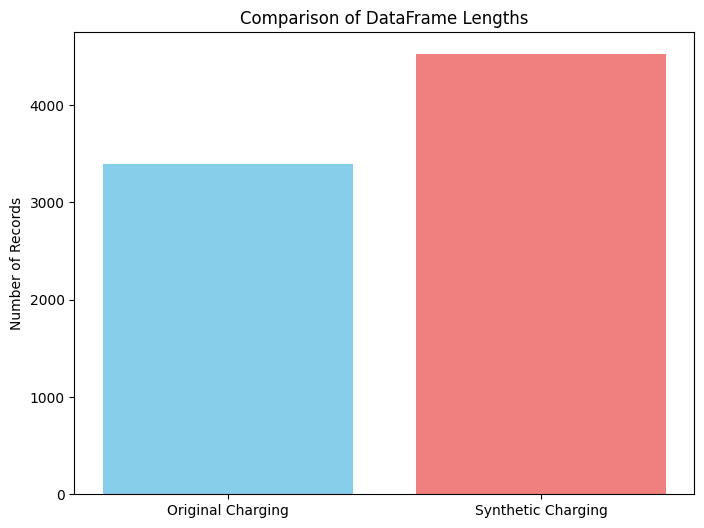

In [22]:
# prompt: Create a plot to compare the length of both dataframe Original_charging and Synthetics_charging

import matplotlib.pyplot as plt

# Assuming 'Original_charging' and 'Synthetics_charging' are already defined DataFrames.

# Calculate the lengths of the DataFrames.
original_length = len(Original_charging)
synthetic_length = len(Synthetics_charging)

# Create a bar plot to compare the lengths.
plt.figure(figsize=(8, 6))
plt.bar(['Original Charging', 'Synthetic Charging'], [original_length, synthetic_length], color=['skyblue', 'lightcoral'])
plt.ylabel('Number of Records')
plt.title('Comparison of DataFrame Lengths')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


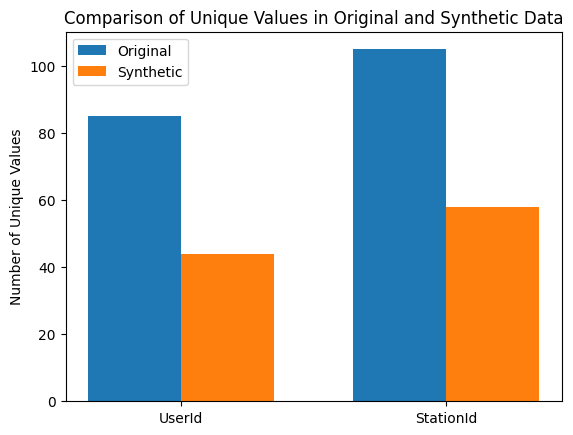

In [20]:
# prompt: Create a plot to compare the number of unique value in columns UserId, StationId, for both dataframe Original_charging and Synthetics_charging

import matplotlib.pyplot as plt

# Calculate the number of unique values for UserId and StationId in both DataFrames
unique_original_userid = Original_charging['UserId'].nunique()
unique_original_stationid = Original_charging['StationId'].nunique()

unique_synthetic_userid = Synthetics_charging['UserId'].nunique()
unique_synthetic_stationid = Synthetics_charging['StationId'].nunique()

# Create a bar plot for comparison
columns = ['UserId', 'StationId']
original_values = [unique_original_userid, unique_original_stationid]
synthetic_values = [unique_synthetic_userid, unique_synthetic_stationid]

x = range(len(columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, original_values, width, label='Original')
rects2 = ax.bar([i + width for i in x], synthetic_values, width, label='Synthetic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Unique Values')
ax.set_title('Comparison of Unique Values in Original and Synthetic Data')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(columns)
ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


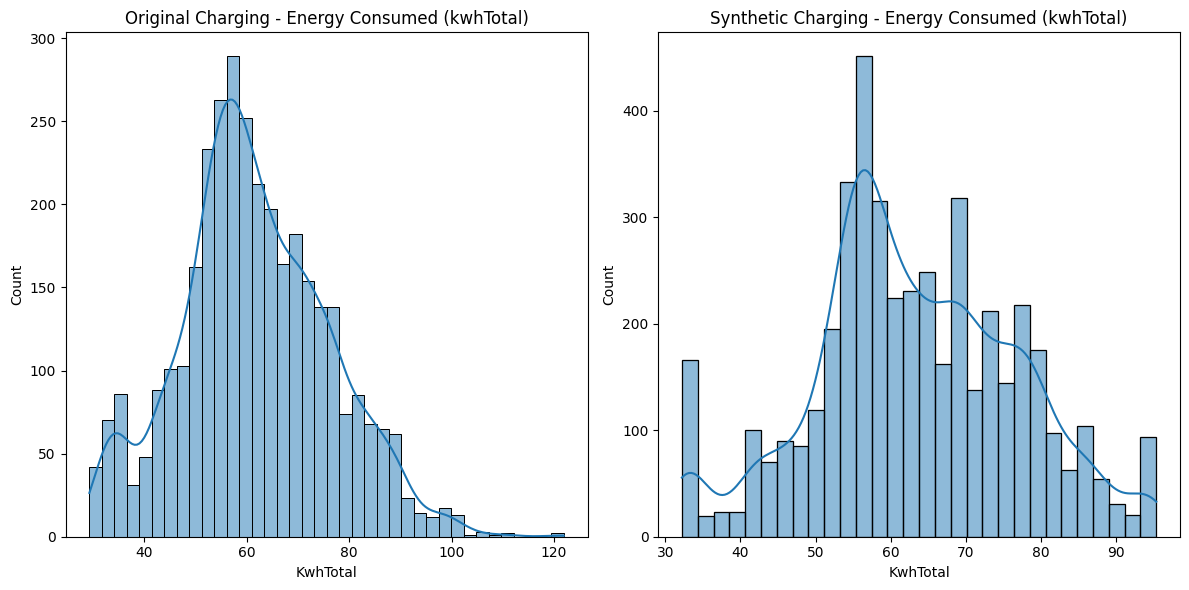

In [27]:
# prompt: Plot the sns.hist Distribution of Energy Consumed kwhTotal for both dataframe Original_charging and Synthetics_charging

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Original_charging['KwhTotal'], kde=True)
plt.title('Original Charging - Energy Consumed (kwhTotal)')

plt.subplot(1, 2, 2)
sns.histplot(Synthetics_charging['KwhTotal'], kde=True)
plt.title('Synthetic Charging - Energy Consumed (kwhTotal)')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


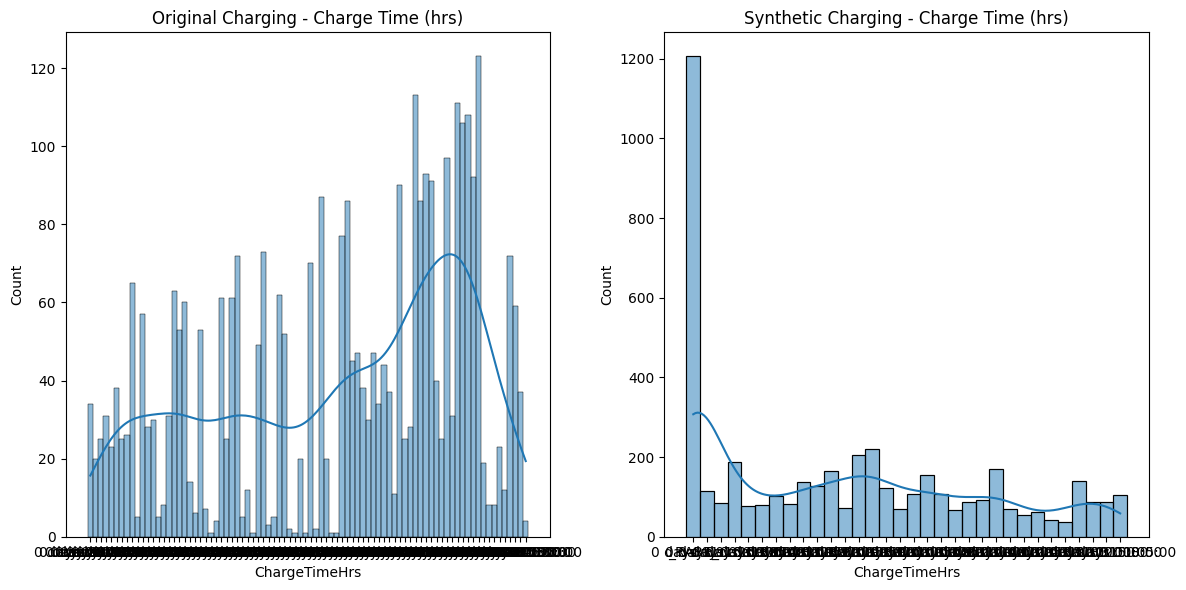

In [28]:
# prompt: Plot the sns.hist Distribution of chargeTimeHrs for both dataframe Original_charging and Synthetics_charging

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Original_charging['ChargeTimeHrs'], kde=True)
plt.title('Original Charging - Charge Time (hrs)')

plt.subplot(1, 2, 2)
sns.histplot(Synthetics_charging['ChargeTimeHrs'], kde=True)
plt.title('Synthetic Charging - Charge Time (hrs)')

plt.tight_layout()
plt.show()

In [32]:
# prompt: Calculate the number of items per year for both dataframe Original_charging and Synthetics_charging

# Convert 'ChargeStartTime' to datetime objects if they aren't already
Original_charging['ChargeStartTime'] = pd.to_datetime(Original_charging['ChargeStartTime'], format='%d/%m/%Y %H:%M', errors='coerce') # Added format and errors arguments
Synthetics_charging['ChargeStartTime'] = pd.to_datetime(Synthetics_charging['ChargeStartTime'], format='%d/%m/%Y %H:%M', errors='coerce') # Added format and errors arguments


# Extract the year from the 'ChargeStartTime' column
Original_charging['Year'] = Original_charging['ChargeStartTime'].dt.year
Synthetics_charging['Year'] = Synthetics_charging['ChargeStartTime'].dt.year

# Group by year and count the number of items
original_items_per_year = Original_charging.groupby('Year').size()
synthetic_items_per_year = Synthetics_charging.groupby('Year').size()

print("Original Charging Items per Year:")
print(original_items_per_year)

print("\nSynthetic Charging Items per Year:")
print(synthetic_items_per_year)


Original Charging Items per Year:
Year
2022      23
2023    3372
dtype: int64

Synthetic Charging Items per Year:
Year
2023.0    1416
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


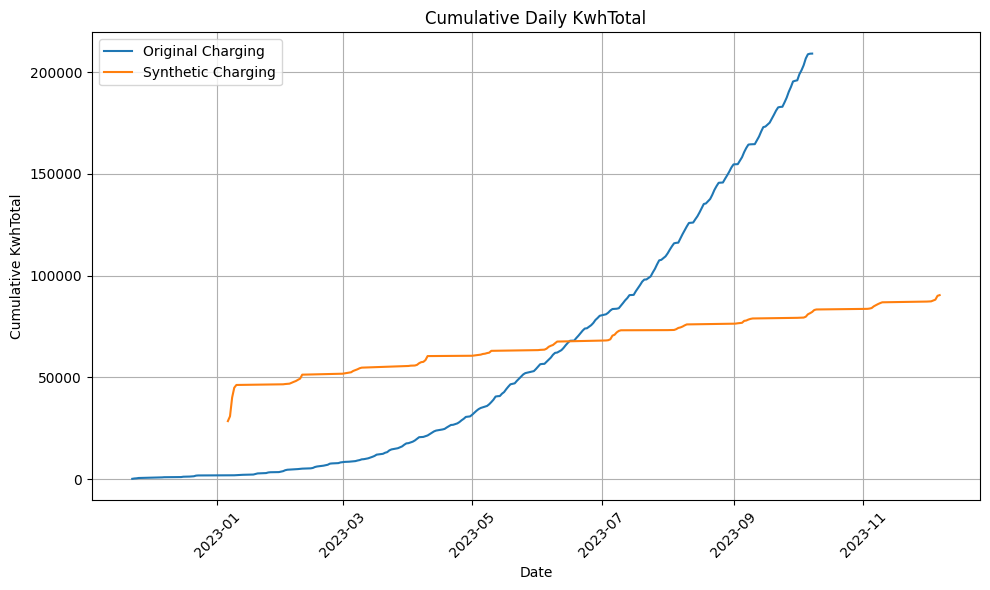

In [33]:
# prompt: plot the cumulative daily KwhTotal for both dataframe Original_charging and Synthetics_charging

# Assuming 'Original_charging' and 'Synthetics_charging' are DataFrames with a 'ChargeStartTime' column and a 'KwhTotal' column.
# Also assuming 'ChargeStartTime' is already in datetime format.  If not, uncomment the lines below.

# Original_charging['ChargeStartTime'] = pd.to_datetime(Original_charging['ChargeStartTime'])
# Synthetics_charging['ChargeStartTime'] = pd.to_datetime(Synthetics_charging['ChargeStartTime'])

# Group by date and sum the KwhTotal
original_daily_kwh = Original_charging.groupby(Original_charging['ChargeStartTime'].dt.date)['KwhTotal'].sum()
synthetic_daily_kwh = Synthetics_charging.groupby(Synthetics_charging['ChargeStartTime'].dt.date)['KwhTotal'].sum()

# Calculate the cumulative sum
original_cumulative_kwh = original_daily_kwh.cumsum()
synthetic_cumulative_kwh = synthetic_daily_kwh.cumsum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(original_cumulative_kwh.index, original_cumulative_kwh.values, label='Original Charging')
plt.plot(synthetic_cumulative_kwh.index, synthetic_cumulative_kwh.values, label='Synthetic Charging')
plt.xlabel('Date')
plt.ylabel('Cumulative KwhTotal')
plt.title('Cumulative Daily KwhTotal')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


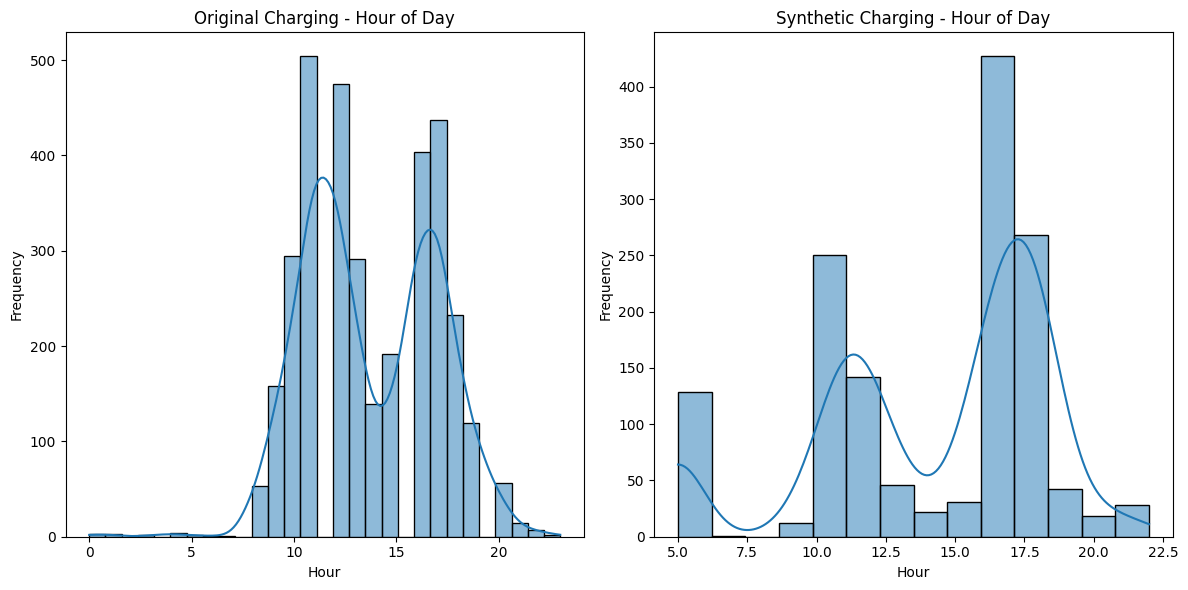

In [35]:
# prompt: from the column ChargeStartTime extract the integer value of the hour both dataframe Original_charging and Synthetics_charging and plot the sns histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Extract the hour from 'ChargeStartTime'
Original_charging['Hour'] = Original_charging['ChargeStartTime'].dt.hour
Synthetics_charging['Hour'] = Synthetics_charging['ChargeStartTime'].dt.hour

# Create the subplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Original_charging['Hour'], kde=True)
plt.title('Original Charging - Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Synthetics_charging['Hour'], kde=True)
plt.title('Synthetic Charging - Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()